**NAME: GAURI KAMBLE \
LGMVIP: DATA SCIENCE \
TASK 1: Iris Flowers Classification ML Project**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
data=pd.read_csv("iris.csv",names=["Sepal_Length_in_cm","Sepal_Width_in_cm","Petal_Length_in_cm","Petal_Width_in_cm","Species_Flower"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sepal_Length_in_cm  150 non-null    float64
 1   Sepal_Width_in_cm   150 non-null    float64
 2   Petal_Length_in_cm  150 non-null    float64
 3   Petal_Width_in_cm   150 non-null    float64
 4   Species_Flower      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data. describe()

,Sepal_Length_in_cm,Sepal_Width_in_cm,Petal_Length_in_cm,Petal_Width_in_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.head()

,Sepal_Length_in_cm,Sepal_Width_in_cm,Petal_Length_in_cm,Petal_Width_in_cm,Species_Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.dtypes

Sepal_Length_in_cm    float64
Sepal_Width_in_cm     float64
Petal_Length_in_cm    float64
Petal_Width_in_cm     float64
Species_Flower         object
dtype: object

In [7]:
data=data.replace(to_replace={'Species_Flower':{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}})
data.head()

,Sepal_Length_in_cm,Sepal_Width_in_cm,Petal_Length_in_cm,Petal_Width_in_cm,Species_Flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:

data['Species_Flower'] = data['Species_Flower'].astype('category').cat.codes

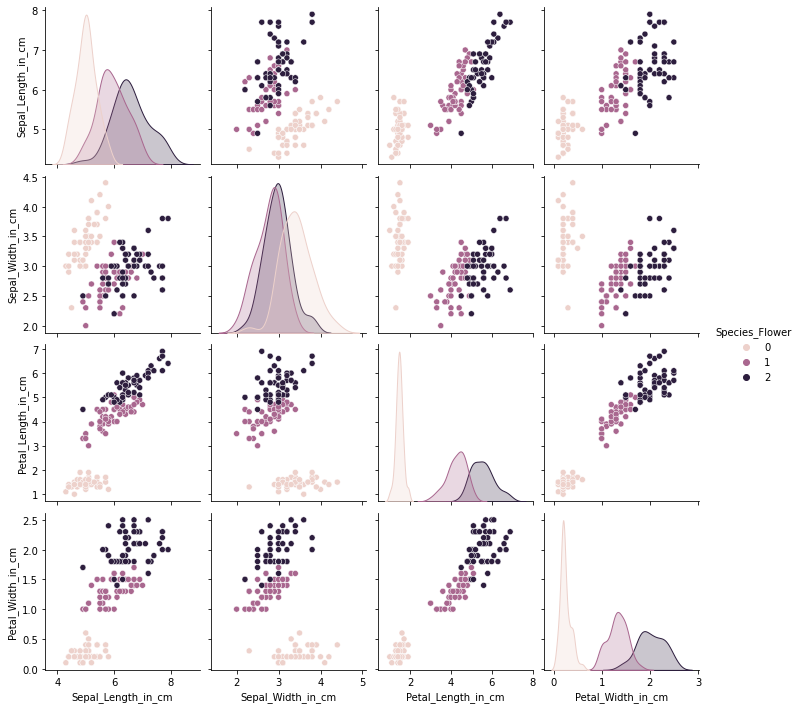

In [9]:
sns.pairplot(data,hue="Species_Flower")

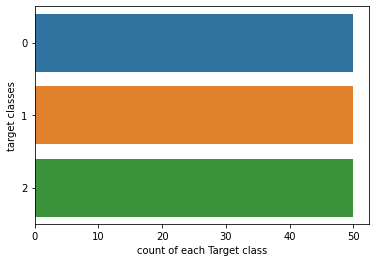

In [10]:
sns.countplot(y=data['Species_Flower'],data=data)
plt.ylabel('target classes')
plt.xlabel('count of each Target class')
plt.show()

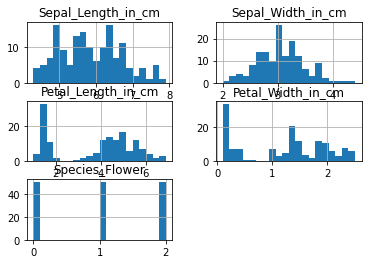

In [11]:
data.hist(bins=20)
plt.title('Feature distibution')
plt.show()

<AxesSubplot:>

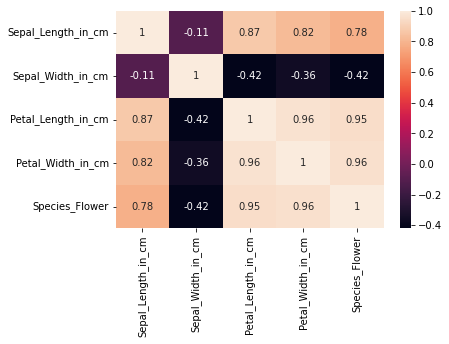

In [12]:
sns.heatmap(data.corr(),annot=True,)

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
data['Species_Flower'] = le.fit_transform = (data['Species_Flower'])
data.head(10)

,Sepal_Length_in_cm,Sepal_Width_in_cm,Petal_Length_in_cm,Petal_Width_in_cm,Species_Flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [15]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['Species_Flower'])
Y = data['Species_Flower']
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.3)

In [16]:
lg= LogisticRegression(max_iter=1000)

In [17]:
lg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [18]:
y_pred=lg.predict(x_test)
score=accuracy_score(y_test,y_pred)

In [19]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
def report(model):
    preds=model.predict(x_test)
    print(classification_report(preds,y_test))
    

In [20]:
print('Logistic Regression')
report(lg)
print(f'Accuracy: {round(score*100,2)}%')

Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.94      0.89      0.91        18
           2       0.89      0.94      0.92        18

    accuracy                           0.93        45
   macro avg       0.95      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45

Accuracy: 93.33%
